In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_path = r'C:\Users\abhay.bhandari\Jupyter files\Practice files\New folder\zomato.csv'
df = pd.read_csv(file_path, encoding='latin-1')
df.head(20)
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [3]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
[features for features in df.columns if df[features].isnull().sum() >0]

['Cuisines']

<Axes: >

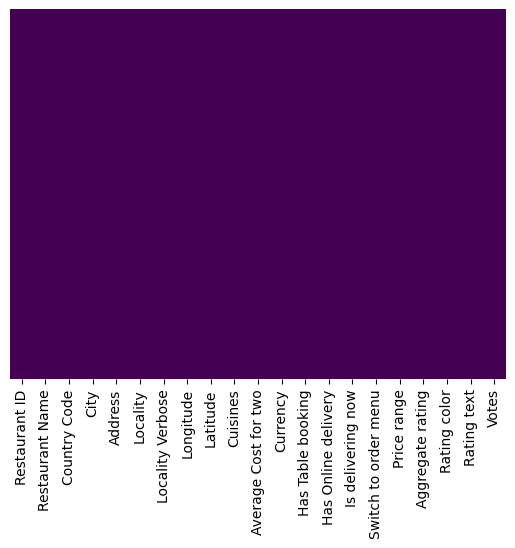

In [5]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [6]:
df_country = pd.read_excel(r"C:\Users\abhay.bhandari\Jupyter files\Practice files\New folder\Country-Code.xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [7]:
final_df = pd.merge(df,df_country,on = 'Country Code',how='left')

In [8]:
final_df.describe()
final_df.dtypes
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [9]:
country_names=final_df.Country.value_counts().index
country_val= final_df.Country.value_counts().values
print(country_names, country_val)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object') [8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


([<matplotlib.patches.Wedge at 0x25e15b99c10>,
 [Text(-1.079055178053478, 0.21363502221306527, 'India'),
  Text(1.0676486633072917, -0.26481376802982426, 'United States'),
  Text(1.0974500606462831, -0.07485562361953522, 'United Kingdom'),
  Text(1.0997704220141564, -0.022472624742216625, 'Brazil')],
 [Text(-0.5885755516655334, 0.11652819393439923, '93.78%'),
  Text(0.5823538163494317, -0.1444438734708132, '4.70%'),
  Text(0.5986091239888817, -0.04083034015611012, '0.87%'),
  Text(0.5998747756440852, -0.012257795313936339, '0.65%')])

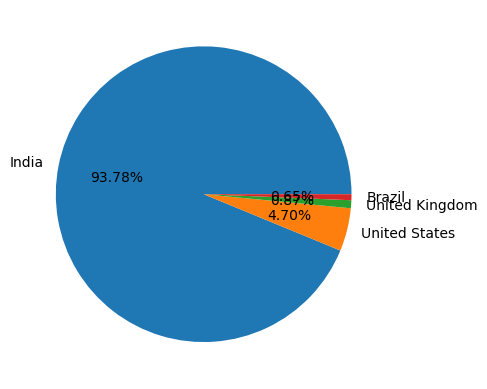

In [10]:
#Top 4 Countries
plt.pie(country_val[:4] , labels=country_names[:4] , autopct = '%1.2f%%')

In [11]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns = {0:'Rating Count'})

####  observations 
1. When Rating is between 4.5 to 4.9---> Excellent
2. When Rating are between 4.0 to 3.4--->very good
3. when Rating is between 3.5 to 3.9----> good
4. when Rating is between 3.0 to 3.4----> average
5. when Rating is between 2.5 to 2.9----> average
6. when Rating is between 2.0 to 2.4----> Poor

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

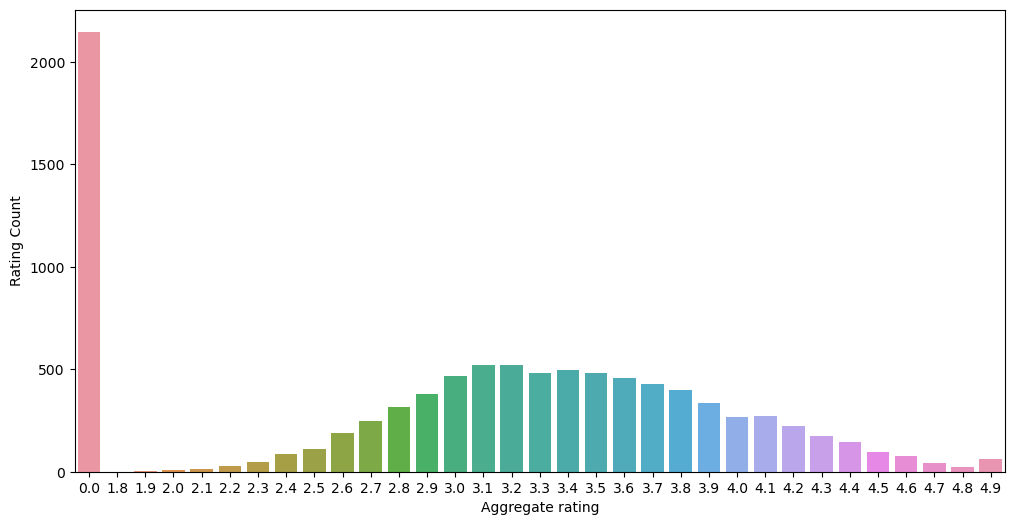

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

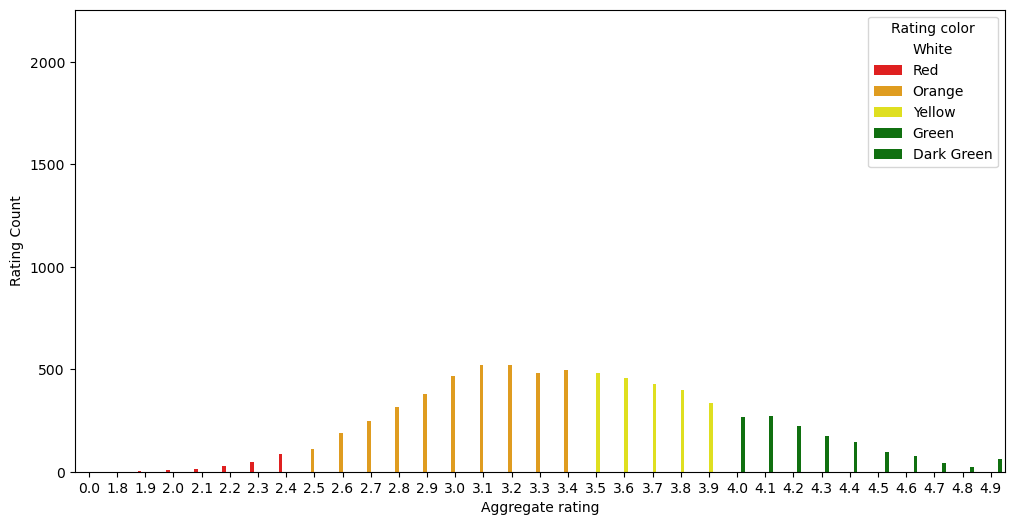

In [13]:
sns.barplot(x="Aggregate rating",y="Rating Count",hue='Rating color',data=ratings,palette=['white', 'red','orange','yellow','green','green'])

<Axes: xlabel='Rating color', ylabel='count'>

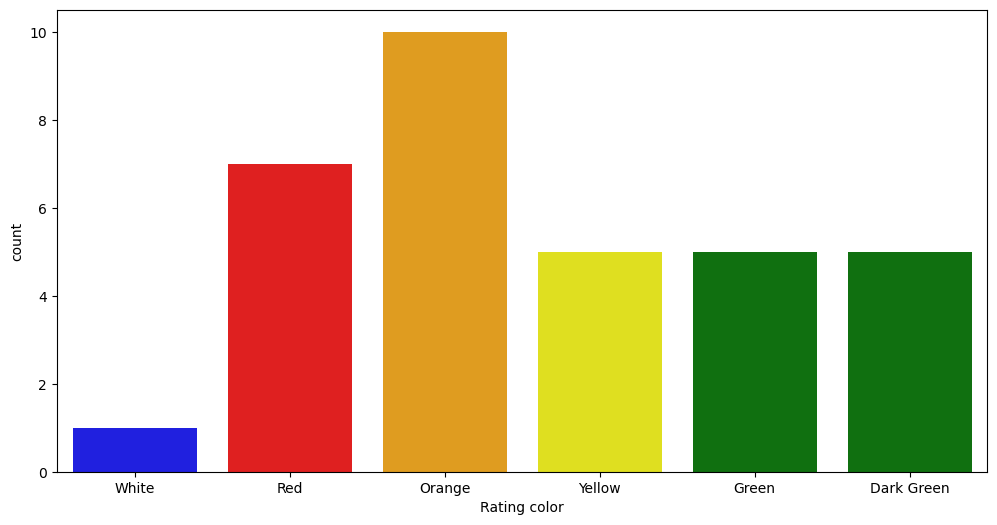

In [14]:
sns.countplot(x = "Rating color", data = ratings, palette = ['blue', 'red','orange','yellow','green','green'])

In [15]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [16]:
final_df[final_df['Rating color'] == 'White'].groupby('Country').size()

Country
Brazil               5
India             2139
United Kingdom       1
United States        3
dtype: int64

In [17]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index().head(4)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


In [18]:
#Currency used by which country
final_df.groupby(['Currency', 'Country']).size()
final_df[['Country','Currency']].groupby(['Country','Currency']).size()

Country         Currency              
Australia       Dollar($)                   24
Brazil          Brazilian Real(R$)          60
Canada          Dollar($)                    4
India           Indian Rupees(Rs.)        8652
Indonesia       Indonesian Rupiah(IDR)      21
New Zealand     NewZealand($)               40
Phillipines     Botswana Pula(P)            22
Qatar           Qatari Rial(QR)             20
Singapore       Dollar($)                   20
South Africa    Rand(R)                     60
Sri Lanka       Sri Lankan Rupee(LKR)       20
Turkey          Turkish Lira(TL)            34
UAE             Emirati Diram(AED)          60
United Kingdom  Pounds(£)                  80
United States   Dollar($)                  434
dtype: int64

In [19]:
#Countries with online deliveries:

final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [20]:
final_df.groupby(['Country','Has Online delivery']).size()
# to check number of online deliveries
final_df.groupby(['Has Online delivery']).size().reset_index()
# for only those with online deliveries :
final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

([<matplotlib.patches.Wedge at 0x25e17e7fe50>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

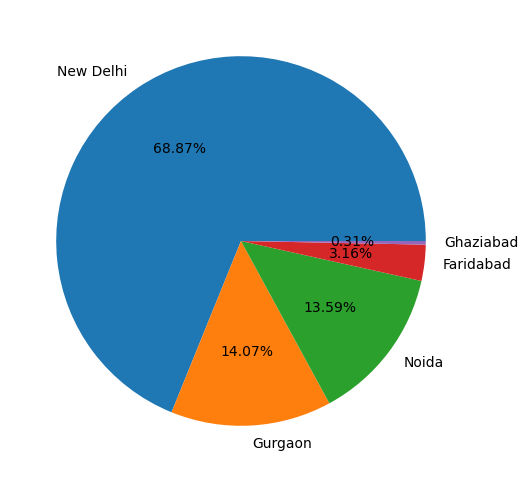

In [21]:
# create a pie chart for 5 top cities
plt.pie(final_df.City.value_counts().values[:5] ,labels = final_df.City.value_counts().index[:5]
       ,autopct = '%1.2f%%')